# Health Care project 

### 1st milestone

### Cleaning data 

In [98]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("Heart_Dis_Data.csv")


In [100]:
df.sample()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
230838,No,30.54,Yes,No,No,0,0,No,Male,65-69,White,No,Yes,Very good,8,No,No,No


In [101]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [102]:
df.shape

(319794, 18)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319794 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319794 non-null  object 
 1   BMI               319794 non-null  float64
 2   Smoking           319794 non-null  object 
 3   AlcoholDrinking   319794 non-null  object 
 4   Stroke            319794 non-null  object 
 5   PhysicalHealth    319794 non-null  int64  
 6   MentalHealth      319794 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319794 non-null  object 
 9   AgeCategory       319794 non-null  object 
 10  Race              319794 non-null  object 
 11  Diabetic          319794 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319794 non-null  object 
 14  SleepTime         319794 non-null  int64  
 15  Asthma            319794 non-null  object 
 16  KidneyDisease     31

In [104]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [105]:
df.duplicated().sum()

np.int64(18078)

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
df.duplicated().sum()

np.int64(0)

Outlier handling 

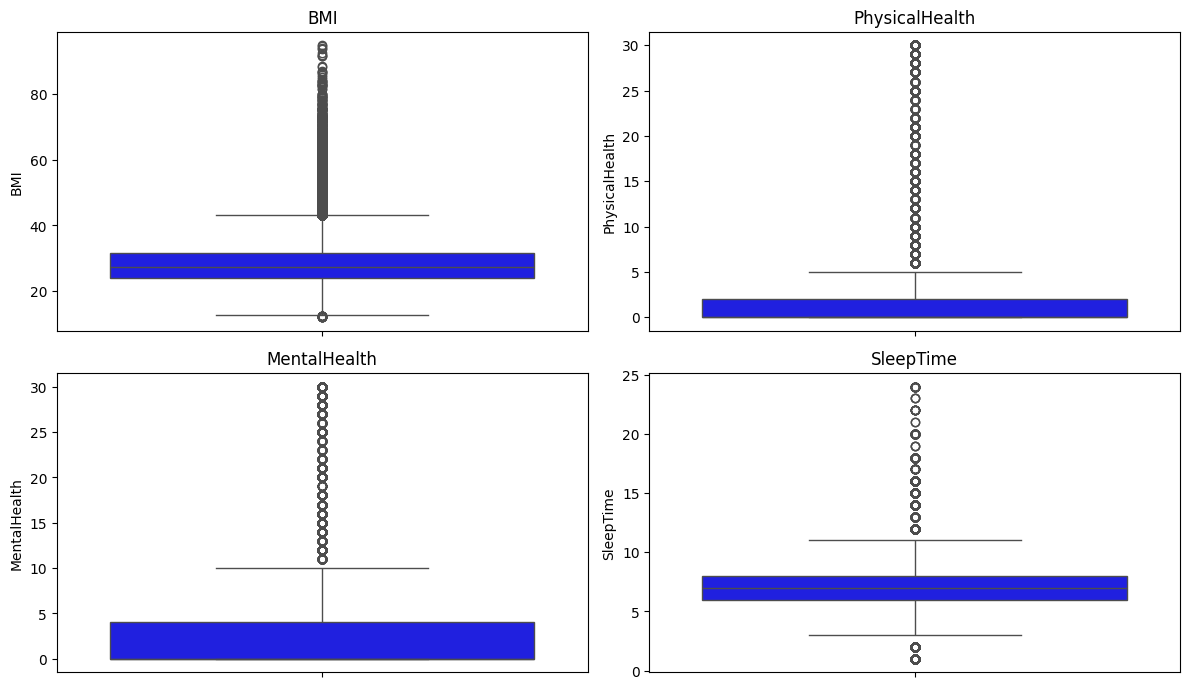

In [108]:
numeric_df = df.select_dtypes(include=['number'])
numerical_cols = numeric_df.columns
num_vars = len(numeric_df.columns)
num_cols = 2
num_rows = 2  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.flatten()

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i] , color = "Blue")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'SleepTime')

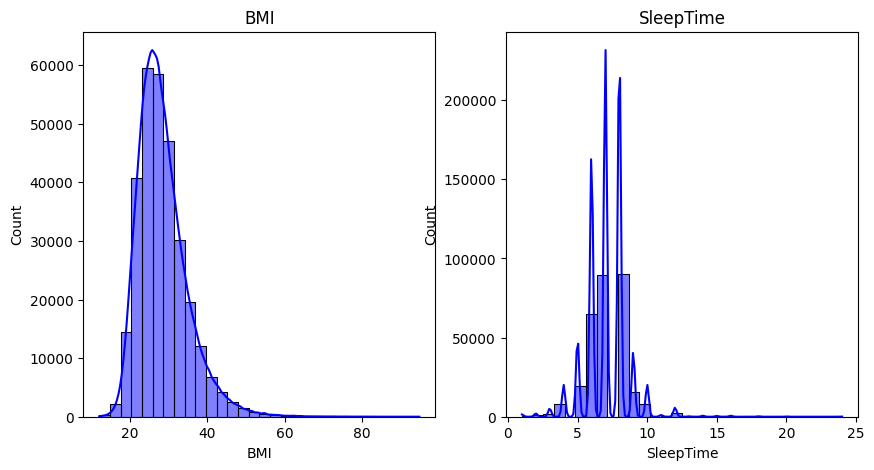

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
sns.histplot(df["BMI"], bins =30, ax=axes[0] , kde=True, color = "Blue")
axes[0].set_title("BMI")
sns.histplot(df["SleepTime"], ax=axes[1], bins =30, kde=True, color = "blue")
axes[1].set_title("SleepTime")

In [110]:
# fixing outliers for bmi
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 60)]

In [111]:
# sleep time outlier handling
Q1 = df["SleepTime"].quantile(0.25)
Q3 = df["SleepTime"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["SleepTime"] >= lower_bound) & (df["SleepTime"] <= upper_bound)]

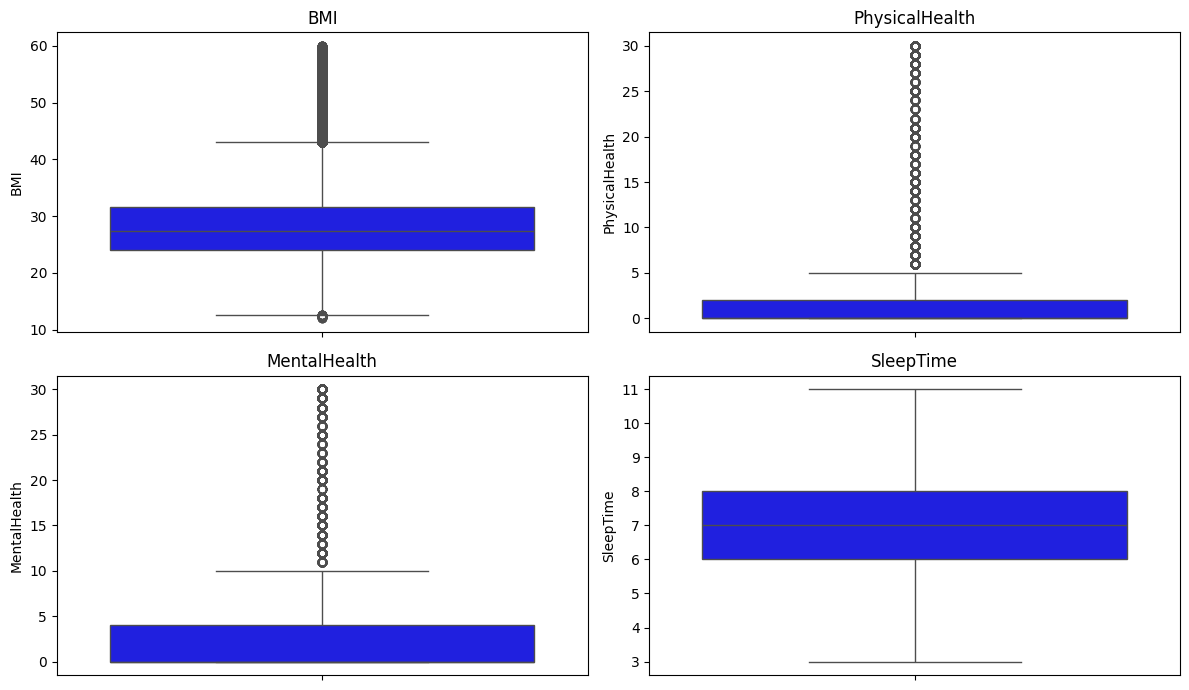

In [112]:
numeric_df = df.select_dtypes(include=['number'])
numerical_cols = numeric_df.columns
num_vars = len(numeric_df.columns)
num_cols = 2
num_rows = 2  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.flatten()

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i] , color = "Blue")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [113]:
# droping mental and pythical health coloumns 
df.drop(columns={"PhysicalHealth","MentalHealth"}, inplace=True)

In [114]:
df_preproccesed = df.copy()
df_preproccesed["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [115]:

age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, 
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
}

df_preproccesed['AgeCategory'] = df_preproccesed['AgeCategory'].map(age_mapping)
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [116]:
df_preproccesed["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [117]:
# Define an ordered mapping
GenHealth_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

# Apply mapping
df_preproccesed['GenHealth'] = df_preproccesed['GenHealth'].map(GenHealth_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [118]:
df_preproccesed = pd.get_dummies(df_preproccesed, columns=['Race'], drop_first=True) # Set `drop_first=True' to remove one column for multicollinearity
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [119]:

binary_mapping = {
    'Yes': 1,
    'No': 0,
    'No, borderline diabetes': 0.5,
    'Yes (during pregnancy)': 1
}


binary_df = df_preproccesed.select_dtypes(include=['object'])

for col in binary_df.columns:
    df_preproccesed[col] = df_preproccesed[col].map(binary_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# EDA

In [120]:
numerical_cols = (df_preproccesed.select_dtypes(include=['number'])).columns
df_preproccesed_std = (df_preproccesed[numerical_cols] - df_preproccesed[numerical_cols].min()) / (df_preproccesed[numerical_cols].max() - df_preproccesed[numerical_cols].min())
df_preproccesed_std.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.095516,1.0,0.0,0.0,0.0,NaN,0.583333,1.0,1.0,0.75,0.250,1.0,0.0,1.0
1,0.0,0.173514,0.0,0.0,1.0,0.0,NaN,1.000000,0.0,1.0,0.75,0.500,0.0,0.0,0.0
2,0.0,0.303650,1.0,0.0,0.0,0.0,NaN,0.750000,1.0,1.0,0.25,0.625,1.0,0.0,0.0
3,0.0,0.254223,0.0,0.0,0.0,0.0,NaN,0.916667,0.0,0.0,0.50,0.375,0.0,0.0,1.0
4,0.0,0.243796,0.0,0.0,0.0,1.0,NaN,0.333333,0.0,1.0,0.75,0.625,0.0,0.0,0.0


Sex Distribuation


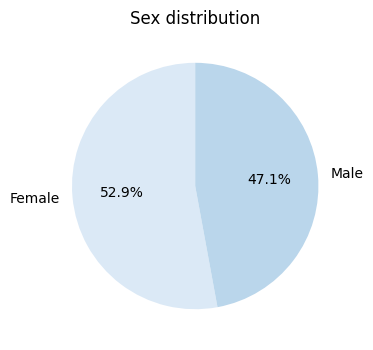

In [121]:
print("Sex Distribuation")
Sex_distribution = df["Sex"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Sex_distribution.values , labels = Sex_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sex distribution")
plt.show()

Heart disease distribution by Sex


C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\2289043336.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x="HeartDisease", y="Count", hue="Sex", data=Sex_counts, palette=colors)


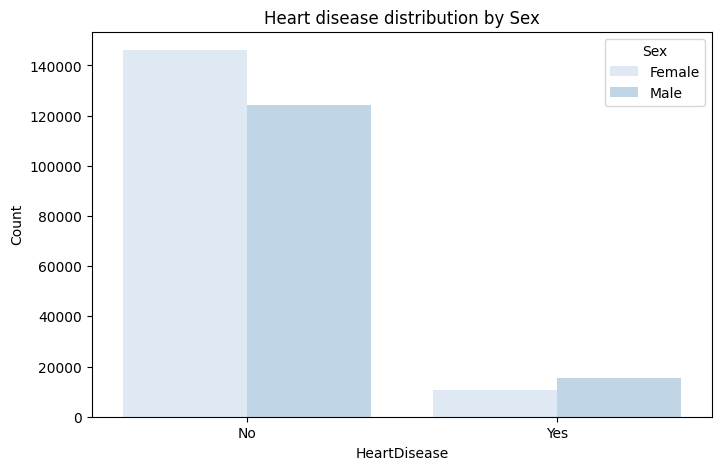

In [122]:
print("Heart disease distribution by Sex")
Sex_counts = df.groupby(["HeartDisease", "Sex"]).size().reset_index(name="Count")
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Sex", data=Sex_counts, palette=colors)
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Sex")
plt.legend(title="Sex")
plt.show()

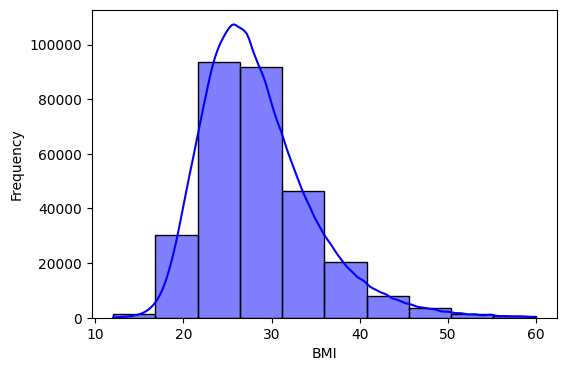

In [123]:
plt.figure(figsize=(6, 4))
sns.histplot(df["BMI"], bins = 10, kde=True ,  color = "Blue")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\3999449862.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x="HeartDisease", y="Count", hue="Smoking", data=smoking_counts, palette=colors)


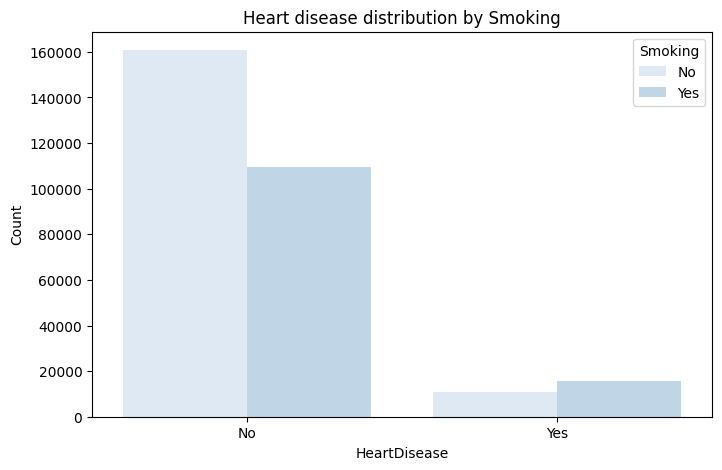

In [124]:
smoking_counts = df.groupby(["HeartDisease", "Smoking"]).size().reset_index(name="Count")

plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Smoking", data=smoking_counts, palette=colors)

plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Smoking")
plt.legend(title="Smoking")

plt.show()

  HeartDisease AlcoholDrinking   Count
0           No              No  250081
1           No             Yes   20186
2          Yes              No   25345
3          Yes             Yes    1093


C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\1752817878.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x="HeartDisease", y="Count", hue="AlcoholDrinking", data=AlcoholDrinking_counts, palette=colors)


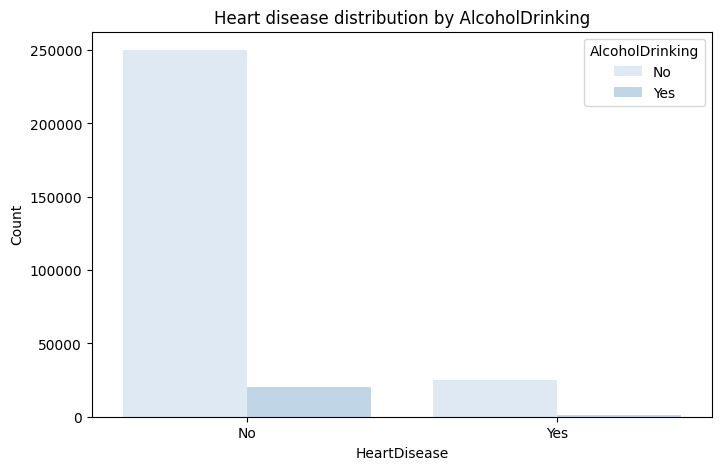

In [125]:
AlcoholDrinking_counts = df.groupby(["HeartDisease", "AlcoholDrinking"]).size().reset_index(name="Count")
print(AlcoholDrinking_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="AlcoholDrinking", data=AlcoholDrinking_counts, palette=colors)
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by AlcoholDrinking")
plt.legend(title="AlcoholDrinking")
plt.show()

In [126]:
df = df[(df["Diabetic"] == "Yes") | (df["Diabetic"] == "No")]

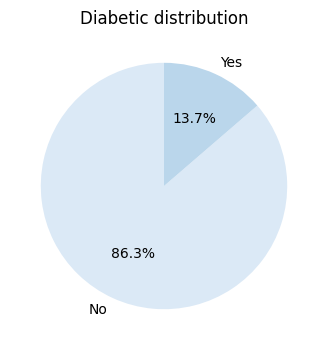

In [127]:
Diabetic_distribution = df["Diabetic"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Diabetic_distribution.values , labels = Diabetic_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Diabetic distribution")
plt.show()

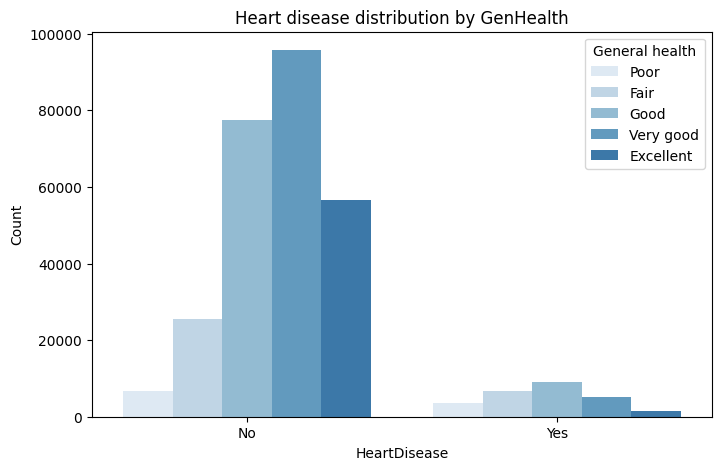

In [128]:
GenHealth_counts = df.groupby(["HeartDisease", "GenHealth"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

GenHealth_colors = {
    "Poor": colors[0],  
    "Fair": colors[1],  
    "Good": colors[2],  
    "Very good": colors[3],
    "Excellent": colors[4]
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = list(GenHealth_colors.keys())

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="GenHealth", 
            data=GenHealth_counts, palette=GenHealth_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by GenHealth")
plt.legend(title="General health")

# Show plot
plt.show()

  HeartDisease Diabetic   Count
0           No       No  231222
1           No      Yes   30738
2          Yes       No   16975
3          Yes      Yes    8590


C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\694972907.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x="HeartDisease", y="Count", hue="Diabetic", data=Diabetic_counts, palette=colors)


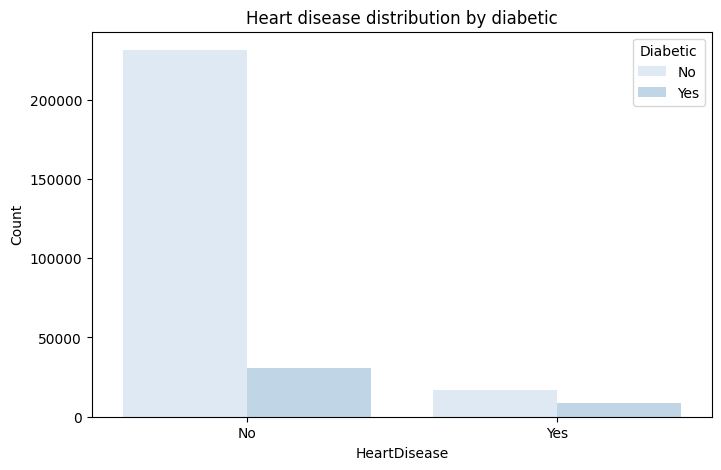

In [134]:
Diabetic_counts = pd.DataFrame(df.groupby(["HeartDisease", "Diabetic"]).size().reset_index(name="Count"))
print(Diabetic_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Diabetic", data=Diabetic_counts, palette=colors)

plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by diabetic")
plt.legend(title="Diabetic")

plt.show()

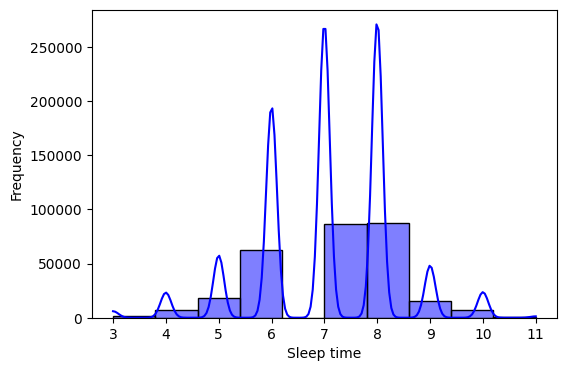

In [130]:
plt.figure(figsize=(6, 4))
sns.histplot(df["SleepTime"], bins = 10, kde=True ,  color = "blue")
# Labels and title
plt.xlabel("Sleep time")
plt.ylabel("Frequency")
# Show plot
plt.show()

In [132]:
# Define an ordered mapping
age_mapping = {
    '18-24': 'Young-Adult', '25-29': 'Young-Adult', '30-34': 'Young-Adult', '35-39': 'Young-Adult',
    '40-44': 'Middle-Adult', '45-49': 'Middle-Adult', '50-54': 'Middle-Adult',
    '55-59': 'Middle-Adult', '60-64': 'Middle-Adult', '65-69': 'Young-Old',
    '70-74': 'Young-Old', '75-79': 'Middle-Old', '80 or older': 'Middle-Old'
}

# Apply mapping
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,Middle-Adult,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,Middle-Old,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,Young-Old,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,Middle-Old,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,Middle-Adult,White,No,Yes,Very good,8,No,No,No


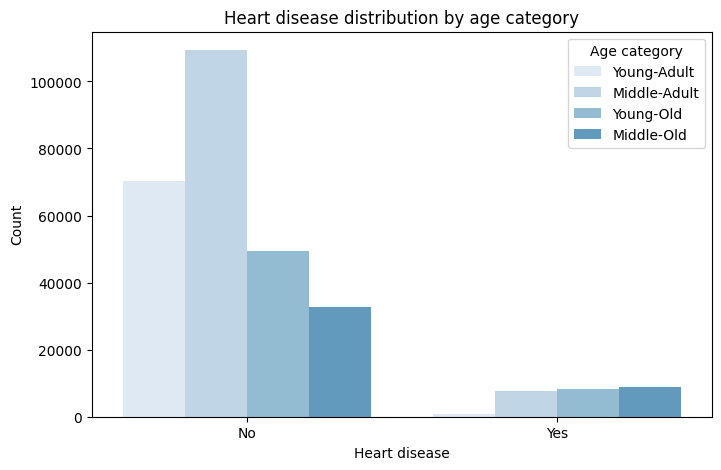

In [133]:
AgeCategory_counts = df.groupby(["HeartDisease", "AgeCategory"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

age_colors = {
    "Young-Adult": colors[0],  
    "Middle-Adult": colors[1],  
    "Young-Old": colors[2],  
    "Middle-Old": colors[3]  
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = ["Young-Adult", "Middle-Adult", "Young-Old", "Middle-Old"]

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="AgeCategory", 
            data=AgeCategory_counts, palette=age_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("Heart disease")
plt.ylabel("Count")
plt.title("Heart disease distribution by age category")
plt.legend(title="Age category")

# Show plot
plt.show()

In [131]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999
colors = sns.color_palette("Blues")  